##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Time series forecasting

## Setup

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#mpl.rcParams['figure.figsize'] = (8, 6)
#mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
csv_path = '/content/drive/My Drive/MIE1075/dataset/recorded/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv'

In [138]:
# Reading/Creating the paths to Figshare dataset
#path = r'./data/'
path = r'/home/ubuntu/MIE1075/data/'
dir = []
for filename in os.listdir(path):

    if os.path.isfile(os.path.join(path, filename)):
        if 'walking_' in filename or '_stairup_' in filename or '_stairdown' in filename:
            dir.append(os.path.join(path, filename))
dir

['/home/ubuntu/MIE1075/data/preliminary_testing_stairup_2_0_2022_12_12-20_51_35.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_10_15_2022_12_12-20_23_18.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_08_15_2022_12_12-20_22_39.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_0_2022_12_12-20_19_30.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_15_0_2022_12_12-20_16_35.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_12_0_2022_12_12-20_17_31.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_16_0_2022_12_12-20_20_55.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_0_2022_12_12-20_18_01.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_09_0_2022_12_12-20_19_58.csv',
 '/home/ubuntu/MIE1075/data/preliminary_t

In [139]:
print(len(dir))

22


In [87]:
filename = dir[21]
print(filename)
df = pd.read_csv(filename, index_col=None, header=0)
print(df.shape)

./data/preliminary_testing_walking_18_0_2022_12_12-20_19_01.csv
(770, 22)


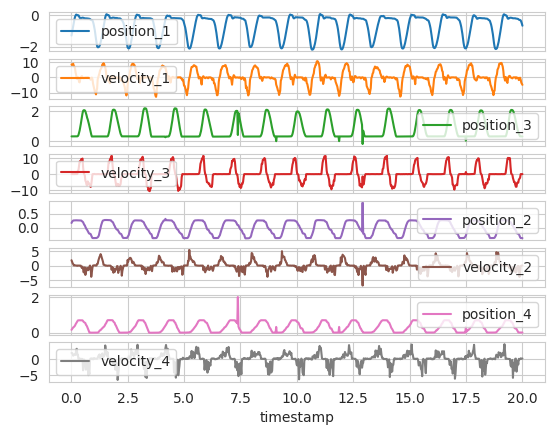

In [85]:
plot_cols = ['position_1', 'velocity_1','position_3', 'velocity_3', 'position_2', 'velocity_2','position_4', 'velocity_4']
plot_features = df[plot_cols]#[50:450]
plot_features.index = df['timestamp']#[50:450]
_ = plot_features.plot(subplots=True)

In [80]:
df = df[50:450]
print(df.shape)

(400, 22)


In [81]:
df.to_csv(filename)

./data/preliminary_testing_stairup_2_0_2022_12_12-20_51_35.csv
./data/preliminary_testing_walking_10_15_2022_12_12-20_23_18.csv
./data/preliminary_testing_walking_08_15_2022_12_12-20_22_39.csv
./data/preliminary_testing_walking_13_0_2022_12_12-20_19_30.csv
./data/preliminary_testing_walking_15_0_2022_12_12-20_16_35.csv
./data/preliminary_testing_walking_12_0_2022_12_12-20_17_31.csv
./data/preliminary_testing_walking_16_0_2022_12_12-20_20_55.csv
./data/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv
./data/preliminary_testing_walking_13_0_2022_12_12-20_18_01.csv
./data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv
./data/preliminary_testing_walking_09_0_2022_12_12-20_19_58.csv
./data/preliminary_testing_walking_13_15_2022_12_12-20_23_49.csv
./data/preliminary_testing_walking_08_0_2022_12_12-20_15_29.csv
./data/preliminary_testing_walking_10_0_2022_12_12-20_16_02.csv
./data/preliminary_testing_walking_18_15_2022_12_12-20_24_50.csv
./data/preliminary_testing_walking_1

,Unnamed: 0,timestamp,position_1,position_2,position_3,position_4,velocity_1,velocity_2,velocity_3,velocity_4,...,rate_dps_x,rate_dps_y,rate_dps_z,accel_mps2_x,accel_mps2_y,accel_mps2_z,euler_rad_x,euler_rad_y,euler_rad_z,intent
0,100.0,2.546709,-0.120300,-0.208069,2.645813,0.064148,-0.003118,-0.012589,5.284054,-3.480911,...,-2.357259,2.039471,-2.715879,0.300222,-0.488606,-0.188332,-1.273500,-1.089386,-0.130907,3
1,101.0,2.573520,-0.120270,-0.208069,2.789215,-0.001770,0.002115,-0.003402,4.046132,-0.305176,...,4.880673,4.081953,-4.669139,-0.286507,0.665047,-0.490620,-1.269899,-1.087296,-0.134786,3
2,102.0,2.598930,-0.120193,-0.207993,2.900177,-0.065735,0.012280,0.018434,4.106818,-3.395081,...,6.140999,-0.211119,-9.843561,-0.785987,-0.657749,0.330649,-1.266197,-1.088062,-0.138258,3
3,103.0,2.624286,-0.120285,-0.207993,2.993362,-0.127502,-0.003871,0.013465,4.280308,-5.006790,...,2.252808,-1.590898,-3.481679,-0.083522,-0.877870,-0.666917,-1.259344,-1.092442,-0.141002,3
4,104.0,2.649033,-0.120300,-0.208008,3.073196,-0.181946,-0.004173,0.004127,1.485514,-2.059937,...,14.997782,-2.452464,0.790287,0.305263,0.367487,-1.002762,-1.256126,-1.094209,-0.141206,3


In [136]:
# intentions are 1 = LEVEL GROUND WALKING | 2 = RAMP UP | 3 = STAIRS UP | 4 = STAIRS DOWN
# Reading the dataset
path =  r'/home/ubuntu/MIE1075/data/'
df_list = []
for f in dir:

    temp = pd.read_csv(f, index_col=None, header=0)
    #if 'walking_' in f and '_0_' in f:

    #    temp['intent'] = 1
    if 'walking_' in f and '_15_20' in f:
        print(f)
        temp['intent'] = 2
    #elif 'stairup' in f:

    #    temp['intent'] = 3
    #elif 'stairdown' in f:

    #    temp['intent'] = 4
    else:
        continue
    df_list.append(temp)
df = pd.concat(df_list, axis=0, ignore_index=True)
df.to_csv(os.path.join(path,'merged_rampup_data.csv'))
print(df.shape)
df.head()

# x_train = []
# y_trian = []
# for i in range(len(df - 100)):
#     x = df[i:i+100]
#     y = df[i+101]
#     x_train.append(x)
#     y_trian.append(y)

./data/preliminary_testing_walking_10_15_2022_12_12-20_23_18.csv
./data/preliminary_testing_walking_08_15_2022_12_12-20_22_39.csv
./data/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv
./data/preliminary_testing_walking_13_15_2022_12_12-20_23_49.csv
./data/preliminary_testing_walking_18_15_2022_12_12-20_24_50.csv
./data/preliminary_testing_walking_07_15_2022_12_12-20_25_23.csv
./data/preliminary_testing_walking_15_15_2022_12_12-20_24_17.csv
(5379, 23)


,timestamp,position_1,position_2,position_3,position_4,velocity_1,velocity_2,velocity_3,velocity_4,att_w,...,rate_dps_x,rate_dps_y,rate_dps_z,accel_mps2_x,accel_mps2_y,accel_mps2_z,euler_rad_x,euler_rad_y,euler_rad_z,intent
0,0.003165,-1.036652,0.789932,0.554535,0.072021,-0.056079,0.667137,-0.002789,1.983643,0.375599,...,-12.782347,25.621738,6.163467,0.114960,-1.269621,0.205209,-1.453347,-0.693748,-1.451990,2
1,0.028033,-1.038376,0.800598,0.554565,0.106628,-0.050319,0.335519,0.004289,1.125336,0.372867,...,-11.134532,26.842325,-7.142726,0.502791,-1.085110,0.273248,-1.449158,-0.692773,-1.465671,2
2,0.054593,-1.039215,0.802597,0.554626,0.132385,-0.013798,-0.005285,-0.011072,0.295639,0.367497,...,-11.195809,28.886860,-23.409250,0.564966,-1.204467,0.264646,-1.443300,-0.698485,-1.482797,2
3,0.079474,-1.043823,0.802017,0.554703,0.171814,-0.335175,-0.038266,-0.014686,2.489090,0.361107,...,1.682856,33.281395,-28.445015,-0.694038,1.004555,0.236438,-1.433335,-0.708840,-1.502511,2
4,0.104012,-1.077332,0.801193,0.554871,0.203796,-1.875495,-0.048657,-0.015590,1.783371,0.355872,...,-11.134949,34.410587,-24.965851,-1.989018,4.929597,1.398692,-1.418714,-0.717984,-1.524008,2


In [156]:
def df_to_datapoints(df, num_input=100, prediction_offset=1, output_column=None):
    x_list = []
    y_list = []
    df = df.drop(['timestamp'], axis=1)
    for i in range(len(df) - num_input - prediction_offset):
        x = df[i:i+num_input]
        y = df.iloc[[i + num_input + prediction_offset]]

        if output_column is not None:
            y = y[output_column]

        x_list.append(x.values)
        y_list.append(y.values)
    return x_list, y_list

#sample_df = pd.read_csv('/home/ubuntu/MIE1075/data/preliminary_testing_normalwalk_0_0_2022_12_12-20_53_28.csv')
#df_to_datapoints(sample_df, output_column=['position_1', 'velocity_1','position_3', 'velocity_3'])

In [162]:
dir_val = dir

['/home/ubuntu/MIE1075/data/preliminary_testing_stairup_2_0_2022_12_12-20_51_35.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_10_15_2022_12_12-20_23_18.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_08_15_2022_12_12-20_22_39.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_0_2022_12_12-20_19_30.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_15_0_2022_12_12-20_16_35.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_12_0_2022_12_12-20_17_31.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_16_0_2022_12_12-20_20_55.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_0_2022_12_12-20_18_01.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv',
 '/home/ubuntu/MIE1075/data/preliminary_testing_walking_09_0_2022_12_12-20_19_58.csv',
 '/home/ubuntu/MIE1075/data/preliminary_t

In [161]:
# intentions are 1 = LEVEL GROUND WALKING | 2 = RAMP UP | 3 = STAIRS UP | 4 = STAIRS DOWN
# Reading the dataset


x_all = []
y_all = []
for f in dir:
    print(f)
    temp = pd.read_csv(f, index_col=None, header=0)
    if 'walking_' in f and '_0_' in f:

        temp['intent'] = 1
    elif 'walking_' in f and '_15_2022' in f:

        temp['intent'] = 2
    elif 'stairup' in f:

        temp['intent'] = 3
    elif 'stairdown' in f:

        temp['intent'] = 4
    else:
        continue

    x, y = df_to_datapoints(temp, num_input=100, prediction_offset=1, output_column=['position_1', 'velocity_1','position_3', 'velocity_3'])
    x_all += x
    y_all += y
    #df_list.append(temp)
#df = pd.concat(df_list, axis=0, ignore_index=True)
#df.to_csv(path+'merged_recorded_data.csv')
print(len(x_all),len(y_all))
print(x_all[0], y_all[0])

/home/ubuntu/MIE1075/data/preliminary_testing_stairup_2_0_2022_12_12-20_51_35.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_10_15_2022_12_12-20_23_18.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_08_15_2022_12_12-20_22_39.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_0_2022_12_12-20_19_30.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_15_0_2022_12_12-20_16_35.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_12_0_2022_12_12-20_17_31.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_16_0_2022_12_12-20_20_55.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_05_15_2022_12_12-20_22_04.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_0_2022_12_12-20_18_01.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_09_0_2022_12_12-20_19_58.csv
/home/ubuntu/MIE1075/data/preliminary_testing_walking_13_15_2022_12_12-20_23_49.csv
/

In [160]:
type(y_all[0])

numpy.ndarray

In [ ]:
# SIMPLE FILE READING
csv_path = r'./data/preliminary_testing_walking_11_0_2022_12_12-20_20_26.csv'
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
#df = df[5::6]
#df = df.drop('Unnamed: 0', axis=1)


In [89]:
date_time = df['timestamp']

In [ ]:
# DROP THE ROWS WITH THRESHOLD FEATURES

Let's take a glance at the data. Here are the first few rows:

In [90]:
df.head()

,Unnamed: 0,timestamp,position_1,position_2,position_3,position_4,velocity_1,velocity_2,velocity_3,velocity_4,...,rate_dps_x,rate_dps_y,rate_dps_z,accel_mps2_x,accel_mps2_y,accel_mps2_z,euler_rad_x,euler_rad_y,euler_rad_z,intent
0,100.0,2.546709,-0.120300,-0.208069,2.645813,0.064148,-0.003118,-0.012589,5.284054,-3.480911,...,-2.357259,2.039471,-2.715879,0.300222,-0.488606,-0.188332,-1.273500,-1.089386,-0.130907,3
1,101.0,2.573520,-0.120270,-0.208069,2.789215,-0.001770,0.002115,-0.003402,4.046132,-0.305176,...,4.880673,4.081953,-4.669139,-0.286507,0.665047,-0.490620,-1.269899,-1.087296,-0.134786,3
2,102.0,2.598930,-0.120193,-0.207993,2.900177,-0.065735,0.012280,0.018434,4.106818,-3.395081,...,6.140999,-0.211119,-9.843561,-0.785987,-0.657749,0.330649,-1.266197,-1.088062,-0.138258,3
3,103.0,2.624286,-0.120285,-0.207993,2.993362,-0.127502,-0.003871,0.013465,4.280308,-5.006790,...,2.252808,-1.590898,-3.481679,-0.083522,-0.877870,-0.666917,-1.259344,-1.092442,-0.141002,3
4,104.0,2.649033,-0.120300,-0.208008,3.073196,-0.181946,-0.004173,0.004127,1.485514,-2.059937,...,14.997782,-2.452464,0.790287,0.305263,0.367487,-1.002762,-1.256126,-1.094209,-0.141206,3


In [91]:
df.shape

(15398, 24)

In [ ]:
# data is corrupoted for this interval so throw it out
#df = df.drop(df.index[700:800])

Here is the evolution of a few features over time:

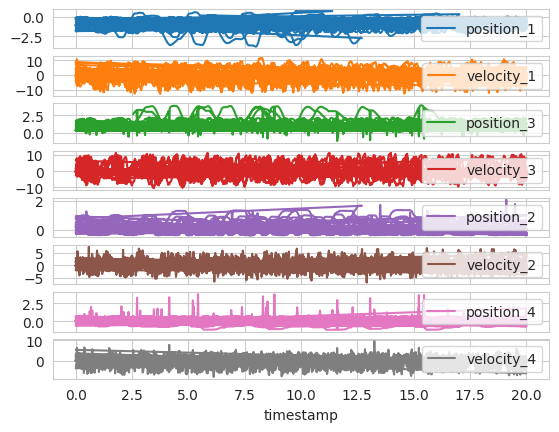

In [92]:
plot_cols = ['position_1', 'velocity_1','position_3', 'velocity_3', 'position_2', 'velocity_2','position_4', 'velocity_4']
plot_features = df[plot_cols]#[700:800]
plot_features.index = df['timestamp']#[700:800]
_ = plot_features.plot(subplots=True)


### Inspect and cleanup

In [93]:
# determine sampling rate

print(date_time.diff().value_counts())
print('time between samples on average is: ',date_time.diff().median())
print('sampling rate is: ',1/date_time.diff().median())
print(len(df), len(df['timestamp'].diff()))

0.024708    7
0.024775    6
0.024730    6
0.024675    6
0.024794    6
           ..
0.027562    1
0.025686    1
0.026383    1
0.026810    1
0.027295    1
Name: timestamp, Length: 12053, dtype: int64
time between samples on average is:  0.025981187820436347
sampling rate is:  38.489387279415205
15398 15398


In [94]:
df['time_diff'] =df['timestamp'].diff()
df['time_diff'][0] = df['timestamp'].diff().median()
df.to_csv(path+'merged_recorded_data.csv')
df.head()

/tmp/ipykernel_720/3991819258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'][0] = df['timestamp'].diff().median()


,Unnamed: 0,timestamp,position_1,position_2,position_3,position_4,velocity_1,velocity_2,velocity_3,velocity_4,...,rate_dps_y,rate_dps_z,accel_mps2_x,accel_mps2_y,accel_mps2_z,euler_rad_x,euler_rad_y,euler_rad_z,intent,time_diff
0,100.0,2.546709,-0.120300,-0.208069,2.645813,0.064148,-0.003118,-0.012589,5.284054,-3.480911,...,2.039471,-2.715879,0.300222,-0.488606,-0.188332,-1.273500,-1.089386,-0.130907,3,0.025981
1,101.0,2.573520,-0.120270,-0.208069,2.789215,-0.001770,0.002115,-0.003402,4.046132,-0.305176,...,4.081953,-4.669139,-0.286507,0.665047,-0.490620,-1.269899,-1.087296,-0.134786,3,0.026811
2,102.0,2.598930,-0.120193,-0.207993,2.900177,-0.065735,0.012280,0.018434,4.106818,-3.395081,...,-0.211119,-9.843561,-0.785987,-0.657749,0.330649,-1.266197,-1.088062,-0.138258,3,0.025410
3,103.0,2.624286,-0.120285,-0.207993,2.993362,-0.127502,-0.003871,0.013465,4.280308,-5.006790,...,-1.590898,-3.481679,-0.083522,-0.877870,-0.666917,-1.259344,-1.092442,-0.141002,3,0.025356
4,104.0,2.649033,-0.120300,-0.208008,3.073196,-0.181946,-0.004173,0.004127,1.485514,-2.059937,...,-2.452464,0.790287,0.305263,0.367487,-1.002762,-1.256126,-1.094209,-0.141206,3,0.024747


In [102]:
columns = df.columns.tolist()
for x in ['timestamp', 'intent','time_diff']:
    columns.remove(x)
columns

['position_1',
 'position_2',
 'position_3',
 'position_4',
 'velocity_1',
 'velocity_2',
 'velocity_3',
 'velocity_4',
 'att_w',
 'att_x',
 'att_y',
 'att_z',
 'rate_dps_x',
 'rate_dps_y',
 'rate_dps_z',
 'accel_mps2_x',
 'accel_mps2_y',
 'accel_mps2_z',
 'euler_rad_x',
 'euler_rad_y',
 'euler_rad_z']

In [101]:
df.head()

,timestamp,position_1,position_2,position_3,position_4,velocity_1,velocity_2,velocity_3,velocity_4,att_w,...,rate_dps_y,rate_dps_z,accel_mps2_x,accel_mps2_y,accel_mps2_z,euler_rad_x,euler_rad_y,euler_rad_z,intent,time_diff
0,2.546709,-0.120300,-0.208069,2.645813,0.064148,-0.003118,-0.012589,5.284054,-3.480911,0.664502,...,2.039471,-2.715879,0.300222,-0.488606,-0.188332,-1.273500,-1.089386,-0.130907,3,0.025981
1,2.573520,-0.120270,-0.208069,2.789215,-0.001770,0.002115,-0.003402,4.046132,-0.305176,0.665260,...,4.081953,-4.669139,-0.286507,0.665047,-0.490620,-1.269899,-1.087296,-0.134786,3,0.026811
2,2.598930,-0.120193,-0.207993,2.900177,-0.065735,0.012280,0.018434,4.106818,-3.395081,0.665467,...,-0.211119,-9.843561,-0.785987,-0.657749,0.330649,-1.266197,-1.088062,-0.138258,3,0.025410
3,2.624286,-0.120285,-0.207993,2.993362,-0.127502,-0.003871,0.013465,4.280308,-5.006790,0.665810,...,-1.590898,-3.481679,-0.083522,-0.877870,-0.666917,-1.259344,-1.092442,-0.141002,3,0.025356
4,2.649033,-0.120300,-0.208008,3.073196,-0.181946,-0.004173,0.004127,1.485514,-2.059937,0.666228,...,-2.452464,0.790287,0.305263,0.367487,-1.002762,-1.256126,-1.094209,-0.141206,3,0.024747


In [99]:

from scipy import signal

'''

fs = 38  # Sampling frequency
# Generate the time vector properly

t = df['timestamp']
t = df.index
signala = df['position_3']
plt.plot(t, signala, label='a')

signalc = df['position_3']


fc = 8  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(6, w/2, 'lowpass')
output = signal.filtfilt(b, a, signalc)

plt.plot(t, output, label='filtered')
plt.legend()
plt.show()

'''
# function for butterworth '
def butter_filt(signal_data):
    fs = 38
    fc = 8  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(6, w/2, 'lowpass')
    return signal.filtfilt(b, a, signal_data)



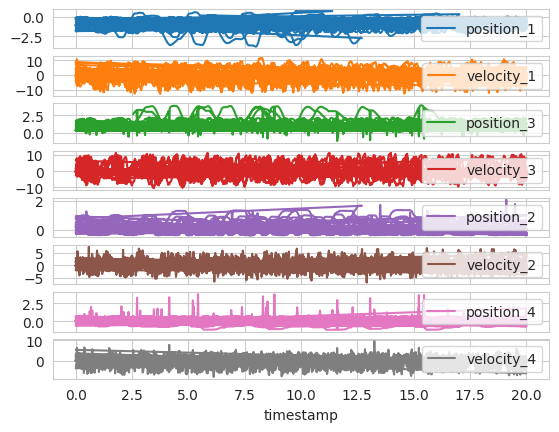

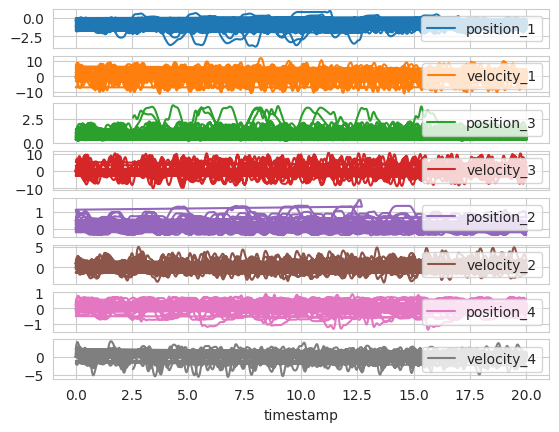

In [103]:
plot_cols = ['position_1', 'velocity_1','position_3', 'velocity_3', 'position_2', 'velocity_2','position_4', 'velocity_4']
plot_features = df[plot_cols]#[15000:]
plot_features.index = df['timestamp']#[15000:]
_ = plot_features.plot(subplots=True)

df[columns]=df[columns].apply(butter_filt)

plot_cols = ['position_1', 'velocity_1','position_3', 'velocity_3', 'position_2', 'velocity_2','position_4', 'velocity_4']
plot_features = df[plot_cols]#[15000:]
plot_features.index = df['timestamp']#[15000:]
_ = plot_features.plot(subplots=True)


Next, look at the statistics of the dataset:

In [104]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,15398.0,9.849657,5.614702,0.003135,5.125450,9.710903,14.582846,20.022328
position_1,15398.0,-0.773785,0.661991,-3.877745,-1.167765,-0.610292,-0.236721,0.933259
position_2,15398.0,0.185748,0.364147,-0.411562,-0.081372,0.166241,0.343146,1.741820
position_3,15398.0,0.946153,0.680413,0.173481,0.335718,0.736905,1.343850,3.960682
position_4,15398.0,0.087852,0.373302,-1.356798,-0.089333,0.118360,0.322624,0.901428
velocity_1,15398.0,0.000792,3.285709,-11.214525,-1.174945,-0.008146,1.479295,11.868271
velocity_2,15398.0,-0.005041,1.171923,-3.702436,-0.736802,-0.070170,0.246808,5.026120
velocity_3,15398.0,0.003256,3.052400,-9.963451,-1.387711,-0.050837,0.432024,10.720135
velocity_4,15398.0,-0.008546,1.195339,-5.645556,-0.275512,0.031160,0.528257,4.334464
att_w,15398.0,0.467689,0.170157,0.101404,0.318212,0.445089,0.642225,0.743377


#### Time

### Split the data

You'll use a `(70%, 20%, 10%)` split for the training, validation, and test sets. Note the data is **not** being randomly shuffled before splitting. This is for two reasons:

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [105]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):]
#test_df = df[int(n*0.9):]

num_features = df.shape[1]
num_features

24

In [106]:
print(df.shape, train_df.shape,val_df.shape)

(15398, 24) (12318, 24) (3080, 24)


In [122]:
from scipy.stats import zscore

df_std = df[columns]
df_std.apply(zscore)
print(df_std.shape)

(15398, 21)


In [ ]:
sns.violinplot(x='Column', y='Normalized', data=df_std)

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

In [107]:
# for the full dataset

train_mean = train_df.mean()
train_std = train_df.std()

train_df[columns] = (train_df[columns] - train_mean[columns]) / train_std[columns]
val_df[columns] = (val_df[columns] - train_mean[columns]) / train_std[columns]


/home/ubuntu/MIE1075/venv/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [108]:
print(train_mean)
print()
print(train_std)

timestamp       9.860561
position_1     -0.772136
position_2      0.157558
position_3      0.888390
position_4      0.126188
velocity_1     -0.002215
velocity_2     -0.007764
velocity_3      0.009362
velocity_4     -0.011396
att_w           0.477281
att_x          -0.564010
att_y          -0.203848
att_z          -0.461073
rate_dps_x      2.654828
rate_dps_y      1.652526
rate_dps_z      0.009060
accel_mps2_x   -0.068448
accel_mps2_y    0.081952
accel_mps2_z    0.016280
euler_rad_x    -1.348718
euler_rad_y    -1.088711
euler_rad_z    -0.741529
intent          1.473210
time_diff       0.000413
dtype: float64

timestamp        5.660805
position_1       0.642617
position_2       0.351446
position_3       0.635129
position_4       0.354065
velocity_1       3.253137
velocity_2       1.135811
velocity_3       3.033133
velocity_4       1.172573
att_w            0.175333
att_x            0.189769
att_y            0.245739
att_z            0.268956
rate_dps_x      20.120599
rate_dps_y      19.0

In [109]:
train_df.head()

,timestamp,position_1,position_2,position_3,position_4,velocity_1,velocity_2,velocity_3,velocity_4,att_w,...,rate_dps_y,rate_dps_z,accel_mps2_x,accel_mps2_y,accel_mps2_z,euler_rad_x,euler_rad_y,euler_rad_z,intent,time_diff
0,2.546709,1.014327,-1.040323,2.766963,-0.175222,-0.000443,-0.004231,1.737613,-2.958955,1.067924,...,0.018026,-0.066579,0.392940,-0.480551,-0.266140,0.494993,-0.003235,0.767752,3,0.025981
1,2.573520,1.014054,-1.040190,3.013456,-0.448922,0.000776,0.005154,1.560427,-2.737097,1.070662,...,-0.023155,-0.083932,0.164859,-0.365083,-0.324658,0.522445,-0.004762,0.763688,3,0.026811
2,2.598930,1.013962,-1.040093,3.163991,-0.566696,0.002117,0.013173,1.369603,-2.463942,1.073242,...,-0.063213,-0.099060,-0.019076,-0.256369,-0.343302,0.549603,-0.007579,0.759944,3,0.025410
3,2.624286,1.014150,-1.040053,3.162454,-0.441875,0.003380,0.018849,1.155295,-2.117493,1.075609,...,-0.102801,-0.110223,-0.127626,-0.160618,-0.299873,0.576402,-0.012530,0.756755,3,0.025356
4,2.649033,1.014576,-1.040084,3.015902,-0.097704,0.004032,0.021743,0.916593,-1.720823,1.077758,...,-0.142405,-0.116600,-0.152620,-0.082533,-0.200454,0.602760,-0.019881,0.754236,3,0.024747


In [121]:
df_std.shape

(323358, 2)

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

Now, peek at the distribution of the features. Some features do have long tails, but there are no obvious errors like the `-9999` wind velocity value.

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (24).

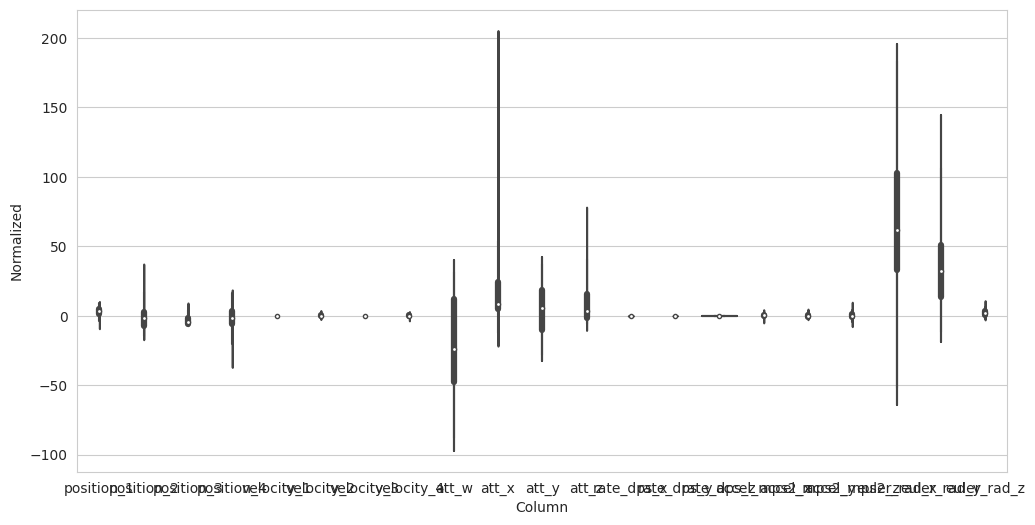

In [123]:
#df_std = df
#df_std[columns] = (df_std[columns] - train_mean[columns]) / train_std[columns]
df_violin = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_violin)
_ = ax.set_xticklabels(df.keys(), rotation=90)

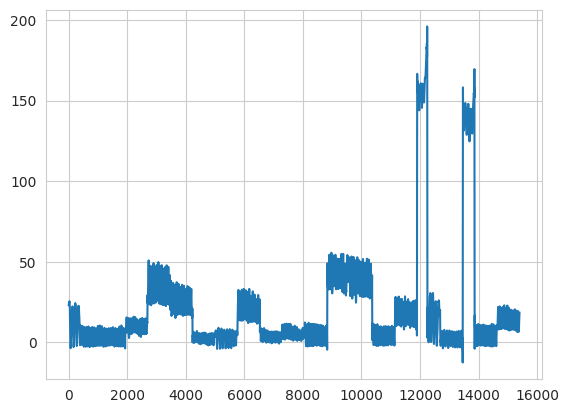

In [126]:
plt.plot(df.att_x)

(array([7.388e+03, 5.010e+03, 2.061e+03, 1.880e+02, 2.000e+00, 2.000e+00,
        8.300e+01, 3.900e+02, 2.380e+02, 3.600e+01]),
 array([-12.55438701,   8.30389598,  29.16217897,  50.02046196,
         70.87874495,  91.73702794, 112.59531093, 133.45359392,
        154.31187691, 175.1701599 , 196.02844289]),
 <BarContainer object of 10 artists>)

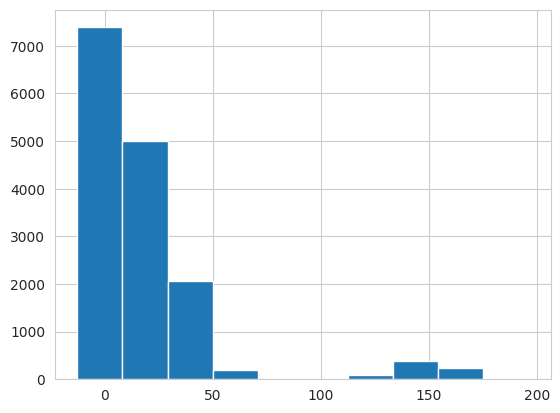

In [124]:
plt.hist(df_std['att_x'])



In [ ]:
train_df.describe().transpose()

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

- *Single-output*, and *multi-output* predictions.
- *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.


Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

1. For example, to make a single prediction 24 hours into the future, given 24 hours of history, you might define a window like this:

  ![One prediction 24 hours into the future.](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/raw_window_24h.png?raw=1)

2. A model that makes a prediction one hour into the future, given six hours of history, would need a window like this:

  ![One prediction one hour into the future.](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/raw_window_1h.png?raw=1)

The rest of this section defines a `WindowGenerator` class. This class can:

1. Handle the indexes and offsets as shown in the diagrams above.
1. Split windows of features into `(features, labels)` pairs.
2. Plot the content of the resulting windows.
3. Efficiently generate batches of these windows from the training, evaluation, and test data, using `tf.data.Dataset`s.

### 1. Indexes and offsets

Start by creating the `WindowGenerator` class. The `__init__` method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to `tf.data.Dataset`s of windows later.

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, #test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
   # self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

Here is code to create the 2 windows shown in the diagrams at the start of this section:

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['position_1'])
w2

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

### 2. Split

Given a list of consecutive inputs, the `split_window` method will convert them to a window of inputs and a window of labels.

The example `w2` you define earlier will be split like this:

![The initial window is all consecutive samples, this splits it into an (inputs, labels) pairs](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/split_window.png?raw=1)

This diagram doesn't show the `features` axis of the data, but this `split_window` function also handles the `label_columns` so it can be used for both the single output and multi-output examples.

Try it out:

Typically, data in TensorFlow is packed into arrays where the outermost index is across examples (the "batch" dimension). The middle indices are the "time" or "space" (width, height) dimension(s). The innermost indices are the features.

The code above took a batch of three 7-time step windows with 19 features at each time step. It splits them into a batch of 6-time step 19-feature inputs, and a 1-time step 1-feature label. The label only has one feature because the `WindowGenerator` was initialized with `label_columns=['T (degC)']`. Initially, this tutorial will build models that predict single output labels.

### 3. Plot

Here is a plot method that allows a simple visualization of the split window:

In [ ]:
def plot(self, model=None, plot_col='position_1', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')

WindowGenerator.plot = plot

This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:

In [ ]:
w2.plot()

You can plot the other columns, but the example window `w2` configuration only has labels for the `T (degC)` column.

In [ ]:
w2.plot(plot_col='velocity_1')

### 4. Create `tf.data.Dataset`s

Finally, this `make_dataset` method will take a time series DataFrame and convert it to a `tf.data.Dataset` of `(input_window, label_window)` pairs using the `tf.keras.utils.timeseries_dataset_from_array` function:

In [ ]:
BATCH_SIZE = 16


def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=BATCH_SIZE,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation, and test data.

Add properties for accessing them as `tf.data.Dataset`s using the `make_dataset` method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)
'''
@property
def test(self):
  return self.make_dataset(self.test_df)
'''

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
#WindowGenerator.test = test
WindowGenerator.example = example

Now, the `WindowGenerator` object gives you access to the `tf.data.Dataset` objects, so you can easily iterate over the data.

The `Dataset.element_spec` property tells you the structure, data types, and shapes of the dataset elements.

In [ ]:
# Each element is an (inputs, label) pair.
w2.train

Iterating over a `Dataset` yields concrete batches:

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

## Single step models

The simplest model you can build on this sort of data is one that predicts a single feature's value—1 time step (one hour) into the future based only on the current conditions.

So, start by building models to predict the `T (degC)` value one hour into the future.

![Predict the next time step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/narrow_window.png?raw=1)

Configure a `WindowGenerator` object to produce these single-step `(input, label)` pairs:

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['position_1'])
single_step_window

The `window` object creates `tf.data.Dataset`s from the training, validation, and test sets, allowing you to easily iterate over batches of data.


In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

### Baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict temperature one hour into the future, given the current value of all features. The current values include the current temperature. 

So, start with a model that just returns the current temperature as the prediction, predicting "No change". This is a reasonable baseline since temperature changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.

![Send the input to the output](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/baseline.png?raw=1)

In [ ]:
output_indecies = [column_indices[x] for x in ['position_1','velocity_1','position_3','velocity_3'] ]

Instantiate and evaluate this model:

In [ ]:
single_step_window

That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

The `WindowGenerator` has a plot method, but the plots won't be very interesting with only a single sample.

So, create a wider `WindowGenerator` that generates windows 24 hours of consecutive inputs and labels at a time. The new `wide_window` variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the `time` axis acts like the `batch` axis: each prediction is made independently with no interaction between time steps:

This expanded window can be passed directly to the same `baseline` model without any code changes. This is possible because the inputs and labels have the same number of time steps, and the baseline just forwards the input to the output:

![One prediction 1h into the future, ever hour.](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/last_window.png?raw=1)

By plotting the baseline model's predictions, notice that it is simply the labels shifted right by one hour:

In the above plots of three examples the single step model is run over the course of 24 hours. This deserves some explanation:

- The blue `Inputs` line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.
- The green `Labels` dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
- The orange `Predictions` crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the `Labels`.

### Linear model

The simplest **trainable** model you can apply to this task is to insert linear transformation between the input and output. In this case the output from a time step only depends on that step:

![A single step prediction](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/narrow_window.png?raw=1)

A `tf.keras.layers.Dense` layer with no `activation` set is a linear model. The layer only transforms the last axis of the data from `(batch, time, inputs)` to `(batch, time, units)`; it is applied independently to every item across the `batch` and `time` axes.

In [ ]:
# multi output
linear_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4)])


In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear_multi(single_step_window.example[0]).shape)

This tutorial trains many models, so package the training procedure into a function:

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Train the model and evaluate its performance:

In [ ]:
history = compile_and_fit(linear_multi, single_step_window)

val_performance['Linear'] = linear_multi.evaluate(single_step_window.val)
#performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Like the `baseline` model, the linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecutive time steps. The `time` axis acts like another `batch` axis. There are no interactions between the predictions at each time step.

![A single step prediction](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/wide_window.png?raw=1)

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', single_step_window.example[0])

Here is the plot of its example predictions on the `wide_window`, note how in many cases the prediction is clearly better than just returning the input temperature, but in a few cases it's worse:

In [ ]:
single_step_window.plot(linear_multi)

One advantage to linear models is that they're relatively simple to  interpret.
You can pull out the layer's weights and visualize the weight assigned to each input:

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear_multi.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Sometimes the model doesn't even place the most weight on the input `T (degC)`. This is one of the risks of random initialization. 

### Dense

Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

Here's a model similar to the `linear` model, except it stacks several a few `Dense` layers between the input and the output:

In [ ]:
# MULTI OUTPUT
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)

### Multi-step dense

A single-time-step model has no context for the current values of its inputs. It can't see how the input features are changing over time. To address this issue the model needs access to multiple time steps when making predictions:

![Three time steps are used for each prediction.](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/conv_window.png?raw=1)


The `baseline`, `linear` and `dense` models handled each time step independently. Here the model will take multiple time steps as input to produce a single output.

Create a `WindowGenerator` that will produce batches of three-hour inputs and one-hour labels:

Note that the `Window`'s `shift` parameter is relative to the end of the two windows.


In [ ]:
CONV_WIDTH = 3
conv_window_multi = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['position_1','velocity_1','position_3','velocity_3'])

conv_window_multi

In [ ]:
conv_window_multi.plot()
plt.title("Given 3 previous inputs, predict the next motor outputs.")

You could train a `dense` model on a multiple-input-step window by adding a `tf.keras.layers.Flatten` as the first layer of the model:

In [ ]:
multi_step_dense_multioutput = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=4),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window_multi.example[0].shape)
print('Output shape:', multi_step_dense_multioutput(conv_window_multi.example[0]).shape)

In [ ]:
history = compile_and_fit(multi_step_dense_multioutput, conv_window_multi)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense_multioutput.evaluate(conv_window_multi.val)

In [ ]:
conv_window_multi.plot(multi_step_dense_multioutput)

The main down-side of this approach is that the resulting model can only be executed on input windows of exactly this shape.

The convolutional models in the next section fix this problem.

### Convolution neural network
 
A convolution layer (`tf.keras.layers.Conv1D`) also takes multiple time steps as input to each prediction.

Below is the **same** model as `multi_step_dense`, re-written with a convolution. 

Note the changes:
* The `tf.keras.layers.Flatten` and the first `tf.keras.layers.Dense` are replaced by a `tf.keras.layers.Conv1D`.
* The `tf.keras.layers.Reshape` is no longer necessary since the convolution keeps the time axis in its output.

In [ ]:
conv_model_multi = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=4),
])

Run it on an example batch to check that the model produces outputs with the expected shape:

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window_multi.example[0].shape)
print('Output shape:', conv_model_multi(conv_window_multi.example[0]).shape)

Train and evaluate it on the ` conv_window` and it should give performance similar to the `multi_step_dense` model.

In [ ]:
history = compile_and_fit(conv_model_multi, conv_window_multi)

IPython.display.clear_output()
val_performance['Conv'] = conv_model_multi.evaluate(conv_window_multi.val)

The difference between this `conv_model` and the `multi_step_dense` model is that the `conv_model` can be run on inputs of any length. The convolutional layer is applied to a sliding window of inputs:

![Executing a convolutional model on a sequence](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/wide_conv_window.png?raw=1)

If you run it on wider input, it produces wider output:

Note that the output is shorter than the input. To make training or plotting work, you need the labels, and prediction to have the same length. So build a `WindowGenerator` to produce wide windows with a few extra input time steps so the label and prediction lengths match: 

In [ ]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['position_1'])

wide_conv_window

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model_multi(wide_conv_window.example[0]).shape)

Now, you can plot the model's predictions on a wider window. Note the 3 input time steps before the first prediction. Every prediction here is based on the 3 preceding time steps:

In [ ]:
wide_conv_window.plot(conv_model_multi)

### Recurrent neural network

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial and the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide.

In this tutorial, you will use an RNN layer called Long Short-Term Memory (`tf.keras.layers.LSTM`).

An important constructor argument for all Keras RNN layers, such as `tf.keras.layers.LSTM`, is the `return_sequences` argument. This setting can configure the layer in one of two ways:

1. If `False`, the default, the layer only returns the output of the final time step, giving the model time to warm up its internal state before making a single prediction: 

![An LSTM warming up and making a single prediction](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/lstm_1_window.png?raw=1)

2. If `True`, the layer returns an output for each input. This is useful for:
  * Stacking RNN layers. 
  * Training a model on multiple time steps simultaneously.

![An LSTM making a prediction after every time step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/lstm_many_window.png?raw=1)

In [ ]:
lstm_model_multi = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=4)
])

With `return_sequences=True`, the model can be trained on 24 hours of data at a time.

Note: This will give a pessimistic view of the model's performance. On the first time step, the model has no access to previous steps and, therefore, can't do any better than the simple `linear` and `dense` models shown earlier.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model_multi(wide_window.example[0]).shape)

In [ ]:
history = compile_and_fit(lstm_model_multi, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model_multi.evaluate(wide_window.val)
#performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

In [ ]:
wide_window.plot(lstm_model_multi)

### Performance

With this dataset typically each of the models does slightly better than the one before it:

In [ ]:
x = np.arange(len(val_performance))
width = 0.5
metric_name = 'mean_absolute_error'
metric_index = lstm_model_multi.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
#test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error position_1, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=val_performance.keys(), rotation=45)
_ = plt.legend()

In [ ]:
for name, value in val_performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

### Multi-output models

The models so far all predicted a single output feature, `T (degC)`, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the `labels` (`example_labels`):

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1 ,label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

wide_window = WindowGenerator(
    input_width=8, label_width=8, shift=1 ,label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
for example_inputs, example_labels in wide_window.val.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Note above that the `features` axis of the labels now has the same depth as the inputs, instead of `1`.

#### Baseline

The same baseline model (`Baseline`) can be used here, but this time repeating all features instead of selecting a specific `label_index`:

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [ ]:
val_performance = {}
#performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)

### trying to build the multioutput single step lstm's baseline here

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1 ,label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

#### Dense

In [ ]:
#TESTING THE 4 OUTPUT FUNCTION
FEATURES_NUM = 23
OUTPUT_NUM = 4
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=OUTPUT_NUM),
    tf.keras.layers.Reshape([1,-1]),
])


In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)

#### RNN


In [ ]:
%%time
num_features = 23
OUTPUT_NUM = 4
wide_window = WindowGenerator(
    input_width=8, label_width=8, shift=1#, label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
#performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

In [ ]:
%%time
num_features = 23
OUTPUT_NUM = 4
wide_window = WindowGenerator(
    input_width=8, label_width=8, shift=1, label_columns=['position_1','position_3','velocity_1','velocity_3']
    )

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=OUTPUT_NUM)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
#performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

<a id="residual"></a>

#### Advanced: Residual connections

The `Baseline` model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this tutorial so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's  simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next time step. Similarly, <a href="https://arxiv.org/abs/1512.03385" class="external">residual networks</a>—or ResNets—in deep learning refer to architectures where each layer adds to the model's accumulating result.

That is how you take advantage of the knowledge that the change should be small.

![A model with a residual connection](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/residual.png?raw=1)

Essentially, this initializes the model to match the `Baseline`. For this task it helps models converge faster, with slightly better performance.

This approach can be used in conjunction with any model discussed in this tutorial. 

Here, it is being applied to the LSTM model, note the use of the `tf.initializers.zeros` to ensure that the initial predicted changes are small, and don't overpower the residual connection. There are no symmetry-breaking concerns for the gradients here, since the `zeros` are only used on the last layer.

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros()),

]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
#performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros()),

]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
#performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

#### Performance

Here is the overall performance for these multi-output models.

In [ ]:
x = np.arange(len(val_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
#test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=val_performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in val_performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

The above performances are averaged across all model outputs.

## Multi-step models

Both the single-output and multiple-output models in the previous sections made **single time step predictions**, one hour into the future.

This section looks at how to expand these models to make **multiple time step predictions**.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

1. Single shot predictions where the entire time series is predicted at once.
2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.

In this section all the models will predict **all the features across all output time steps**.


For the multi-step model, the training data again consists of hourly samples. However, here, the models will learn to predict 24 hours into the future, given 24 hours of the past.

Here is a `Window` object that generates these slices from the dataset:

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baselines

A simple baseline for this task is to repeat the last input time step for the required number of output time steps:

![Repeat the last input, for each output step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_last.png?raw=1)

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Since this task is to predict 24 hours into the future, given 24 hours of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:

![Repeat the previous day](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_repeat.png?raw=1)

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a `tf.keras.layers.Dense` with `OUT_STEPS*features` output units. The model just needs to reshape that output to the required `(OUTPUT_STEPS, features)`.

#### Linear

A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict `OUTPUT_STEPS` time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

![Predict all timesteps from the last time-step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_dense.png?raw=1)

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Dense

Adding a `tf.keras.layers.Dense` between the input and output gives the linear model more power, but is still only based on a single input time step.

#### CNN

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

![A convolutional model sees how things change over time](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_conv.png?raw=1)

#### RNN

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 24 hours, before making a single prediction for the next 24 hours.

In this single-shot format, the LSTM only needs to produce an output at the last time step, so set `return_sequences=False` in `tf.keras.layers.LSTM`.

![The LSTM accumulates state over the input window, and makes a single prediction for the next 24 hours](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_lstm.png?raw=1)


In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then, each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic <a href="https://arxiv.org/abs/1308.0850" class="external">Generating Sequences With Recurrent Neural Networks</a>.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

![Feedback a model's output to its input](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_autoregressive.png?raw=1)

#### RNN

This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single time step.

The model will have the same basic form as the single-step LSTM models from earlier: a `tf.keras.layers.LSTM` layer followed by a `tf.keras.layers.Dense` layer that converts the `LSTM` layer's outputs to model predictions.

A `tf.keras.layers.LSTM` is a `tf.keras.layers.LSTMCell` wrapped in the higher level `tf.keras.layers.RNN` that manages the state and sequence results for you (Check out the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide for details).

In this case, the model has to manually manage the inputs for each step, so it uses `tf.keras.layers.LSTMCell` directly for the lower level, single time step interface.

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

The first method this model needs is a `warmup` method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step `LSTM` model from earlier:

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction and the internal state of the `LSTM`:

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape
